In [9]:
# Extract from https://github.com/StanfordVL/behavior/blob/main/behavior/benchmark/behavior_benchmark.py
import os
import numpy as np

from PIL import Image
from igibson.utils.utils import parse_config

from igibson import object_states
from igibson.utils.utils import restoreState

from igibson.action_primitives.behavior_robot_semantic_actions_env import BehaviorRobotSemanticActionEnv
from igibson.custom_utils import get_env_config, print_properties
from igibson.primitives_utils import get_names_of_visible_obj_inside, get_objects_inside, settle_physics 
import igibson.render_utils as render_utils

import warnings
warnings.filterwarnings("ignore")

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Env config
task = "cleaning_out_drawers"
scene_id =  "Benevolence_1_int"

# Init env
sim_env = BehaviorRobotSemanticActionEnv(task, scene_id, verbose=True)

Rendering settings is None - going with the default settings!
																																																																						b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
left_hand_shoulderb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
right_hand_shoulderb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
neckb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data

### Dev

In [12]:
sim_env.robot._ag_obj_in_hand[sim_env.arm] # outputs None if hand is empty

In [13]:
sim_env.robot.is_grasping() # doesn't work

<IsGraspingState.FALSE: -1>

### Official Demo

In [14]:
# Pick which object to navigate to
# 'sink.n.01_1' (nothing inside)
# 'cabinet.n.01_1' (contains 'bowl.n.01_1', 'bowl.n.01_2', 'piece_of_cloth.n.01_1' )
# 'cabinet.n.01_2' (contains 'spoon.n.01_1' and 'spoon.n.01_2')
# See all list with 
# print(env.task.object_scope)

plan = [
    {'action':'go_to', 'params':{'obj_name':'cabinet.n.01_1'}},
    {'action':'open', 'params':{'obj_name':'cabinet.n.01_1'}}, # TODO: add better prompts for the outer loop + it's failing too often
    {'action':'grasp', 'params':{'obj_name':'bowl.n.01_1'}} # TODO: make the grasp more realistic somehow 
       ]

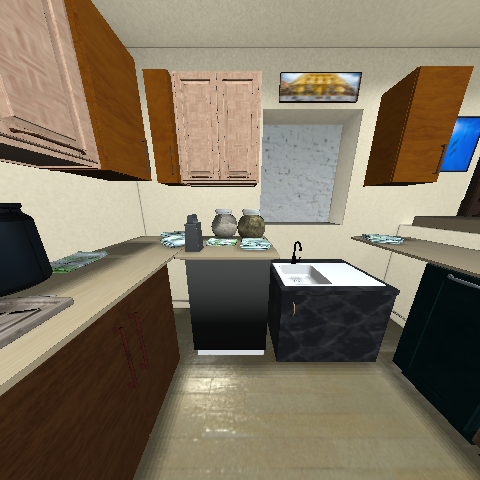

Start collision test.
End collision test.
Action {'action': 'go_to', 'params': {'obj_name': 'cabinet.n.01_1'}} executed. Success: True


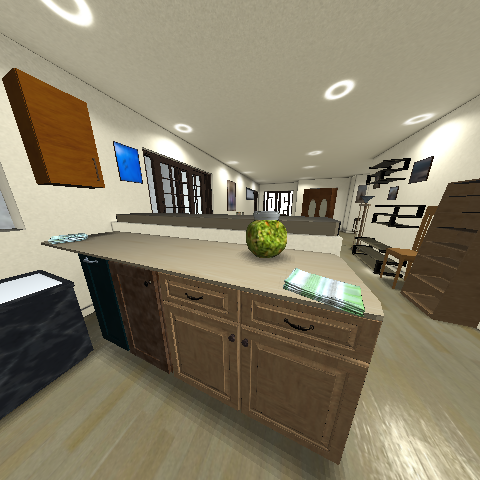

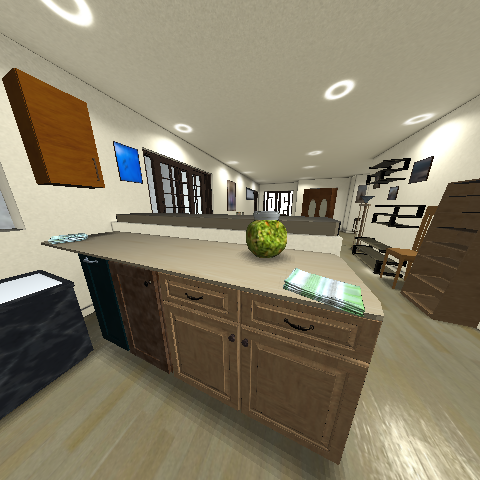

cabinet.n.01_1 is open: False
cabinet.n.01_1 is open: True


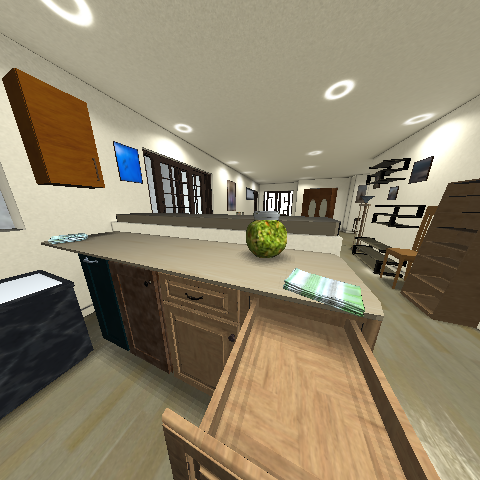

Making visible bowl.n.01_1
Success: True
Object successfully moved to a visible position inside the container (2050 pixels visible)
bowl.n.01_1 is inside cabinet.n.01_1
bowl.n.01_1 is NOT colliding with any object
bowl.n.01_1 is visible: True - Pixels visible: 2050
bowl.n.01_1 is near: True
Distance from shoulder: 0.618
bowl.n.01_2 is inside cabinet.n.01_1
bowl.n.01_2 is NOT colliding with any object
bowl.n.01_2 is visible: False - Pixels visible: 0
bowl.n.01_2 is near: False
Distance from shoulder: 1.234
piece_of_cloth.n.01_1 is inside cabinet.n.01_1
piece_of_cloth.n.01_1 is NOT colliding with any object
piece_of_cloth.n.01_1 is visible: False - Pixels visible: 0
piece_of_cloth.n.01_1 is near: False
Distance from shoulder: 1.161


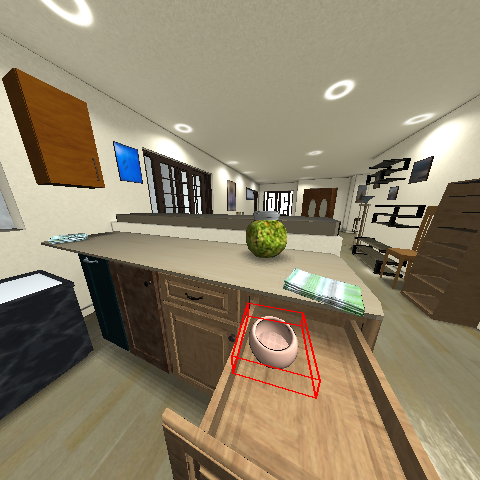

Making visible bowl.n.01_2
Success: True
Object successfully moved to a visible position inside the container (7464 pixels visible)
bowl.n.01_1 is inside cabinet.n.01_1
bowl.n.01_1 is NOT colliding with any object
bowl.n.01_1 is visible: True - Pixels visible: 2051
bowl.n.01_1 is near: True
Distance from shoulder: 0.618
bowl.n.01_2 is inside cabinet.n.01_1
bowl.n.01_2 is NOT colliding with any object
bowl.n.01_2 is visible: True - Pixels visible: 7464
bowl.n.01_2 is near: True
Distance from shoulder: 0.394
piece_of_cloth.n.01_1 is inside cabinet.n.01_1
piece_of_cloth.n.01_1 is NOT colliding with any object
piece_of_cloth.n.01_1 is visible: False - Pixels visible: 0
piece_of_cloth.n.01_1 is near: False
Distance from shoulder: 1.161


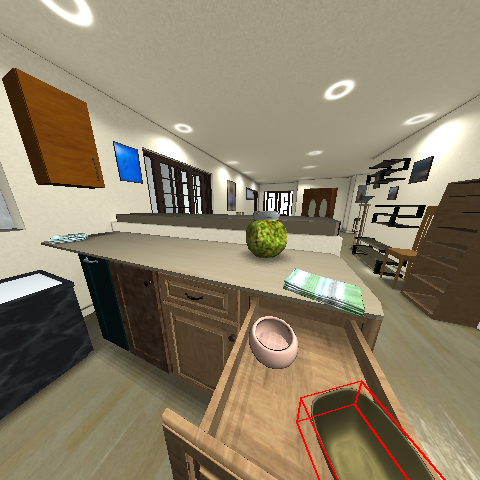

Making visible piece_of_cloth.n.01_1
Success: False
Failed due to exhausting the budget
bowl.n.01_1 is inside cabinet.n.01_1
bowl.n.01_1 is NOT colliding with any object
bowl.n.01_1 is visible: True - Pixels visible: 2051
bowl.n.01_1 is near: True
Distance from shoulder: 0.618
bowl.n.01_2 is inside cabinet.n.01_1
bowl.n.01_2 is NOT colliding with any object
bowl.n.01_2 is visible: True - Pixels visible: 7464
bowl.n.01_2 is near: True
Distance from shoulder: 0.394
piece_of_cloth.n.01_1 is inside cabinet.n.01_1
piece_of_cloth.n.01_1 is NOT colliding with any object
piece_of_cloth.n.01_1 is visible: True - Pixels visible: 2996
piece_of_cloth.n.01_1 is near: False
Distance from shoulder: 1.161
bowl.n.01_1 IsVisible:  True
bowl.n.01_1 IsInside:  True
bowl.n.01_1 IsNear:  True
Distance from shoulder: 0.618
bowl.n.01_2 IsVisible:  True
bowl.n.01_2 IsInside:  True
bowl.n.01_2 IsNear:  True
Distance from shoulder: 0.394
piece_of_cloth.n.01_1 IsVisible:  True
piece_of_cloth.n.01_1 IsInside:  Tru

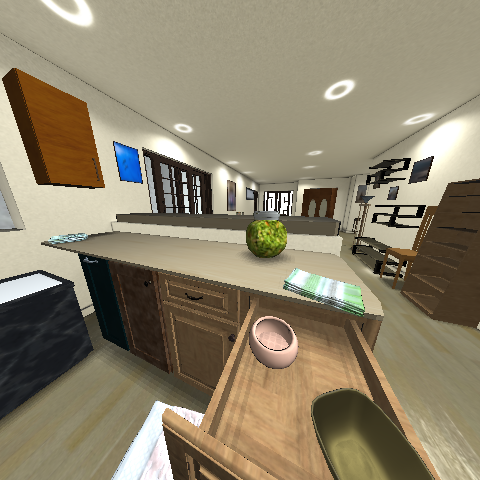

robot_pos: [-0.78190346  0.22444161  0.55      ], quaternion_pose: +0.824 -0.000i +0.000j -0.566k
Target trg_obj_pos: [-0.58083848 -0.01963394  1.2       ]


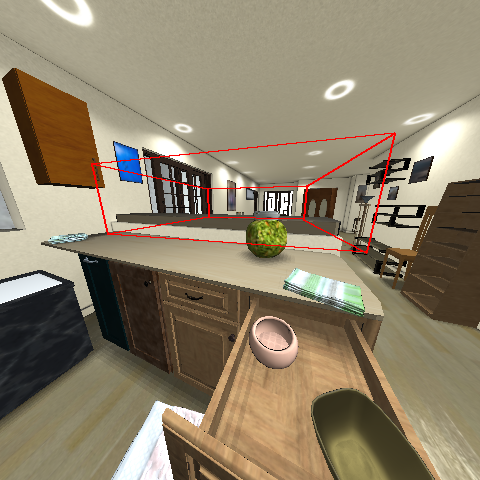

grasp_pose: (array([-0.69498697, -0.03264223,  1.18189105]), array([-0.61145134,  0.54547189, -0.3815976 ,  0.42775104])) - object_direction: [9.93516565e-01 1.13687421e-01 7.78161974e-05]
Step 0 - object in hand: None - Robot is gripping the candidate object: -1


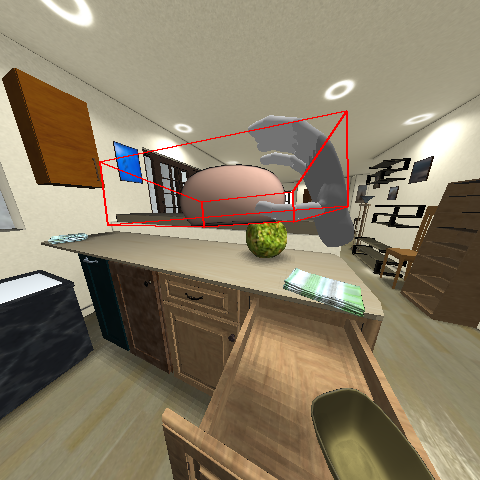

Step 1 - object in hand: None - Robot is gripping the candidate object: -1


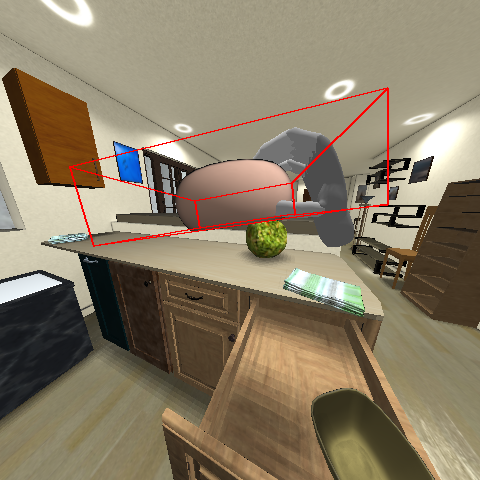

Step 2 - object in hand: None - Robot is gripping the candidate object: -1


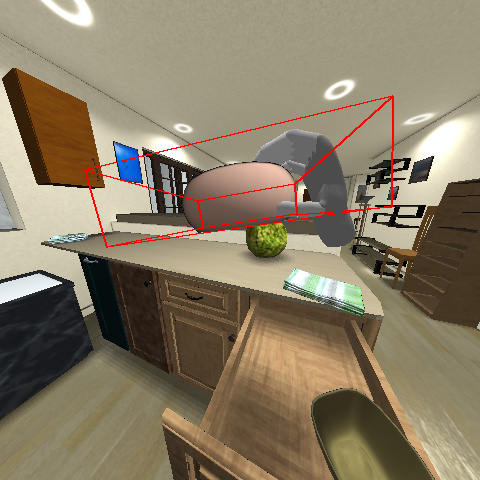

Step 3 - object in hand: <igibson.objects.articulated_object.URDFObject object at 0x14e0b8bc3fa0> - Robot is gripping the candidate object: -1


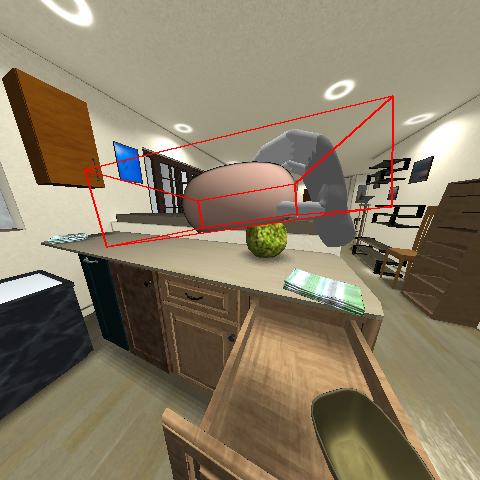

Step 4 - object in hand: <igibson.objects.articulated_object.URDFObject object at 0x14e0b8bc3fa0> - Robot is gripping the candidate object: -1


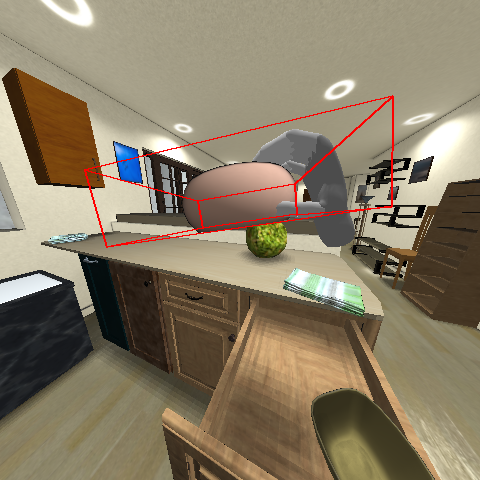

Step 5 - object in hand: <igibson.objects.articulated_object.URDFObject object at 0x14e0b8bc3fa0> - Robot is gripping the candidate object: -1


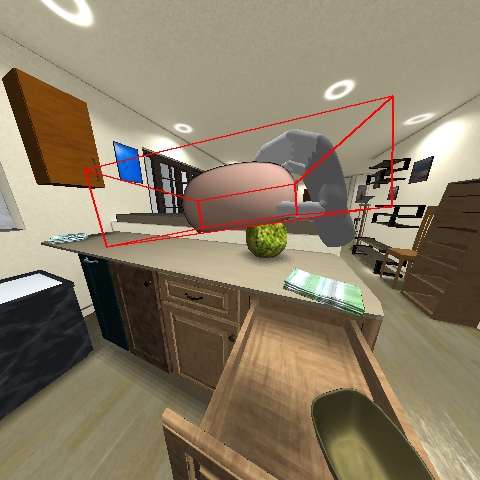

Step 6 - object in hand: <igibson.objects.articulated_object.URDFObject object at 0x14e0b8bc3fa0> - Robot is gripping the candidate object: -1


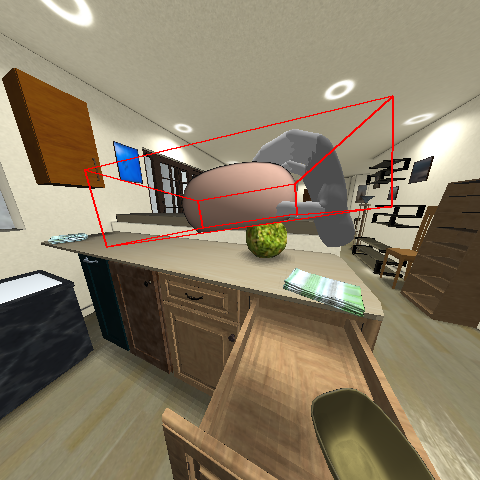

Step 7 - object in hand: <igibson.objects.articulated_object.URDFObject object at 0x14e0b8bc3fa0> - Robot is gripping the candidate object: -1


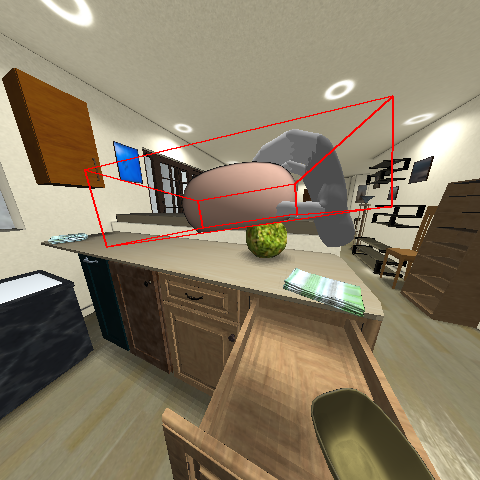

Step 8 - object in hand: <igibson.objects.articulated_object.URDFObject object at 0x14e0b8bc3fa0> - Robot is gripping the candidate object: -1


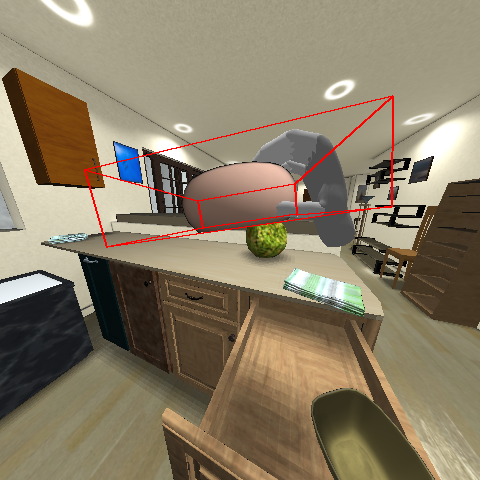

Step 9 - object in hand: <igibson.objects.articulated_object.URDFObject object at 0x14e0b8bc3fa0> - Robot is gripping the candidate object: -1


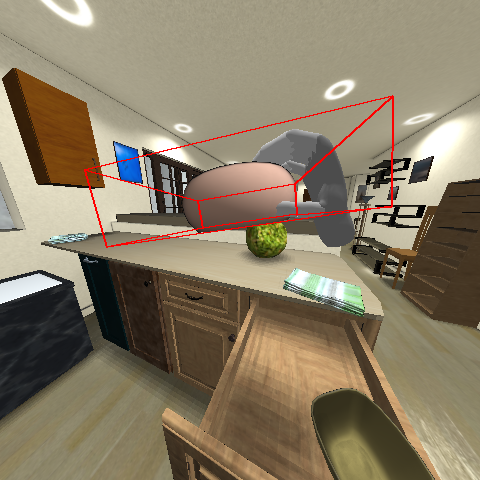

Action {'action': 'grasp', 'params': {'obj_name': 'bowl.n.01_1'}} executed. Success: True


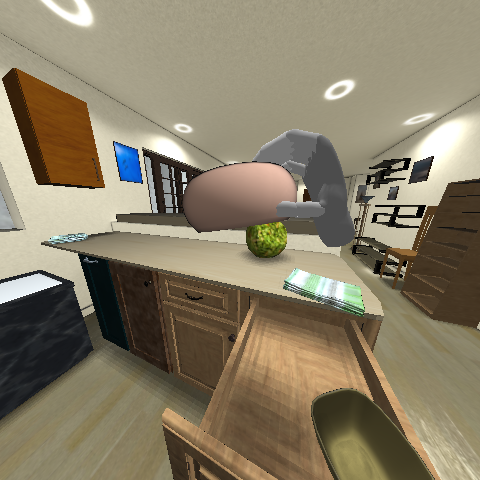

In [15]:
image, symbolic_state = sim_env.get_state_and_image()

# TODO: Render image and print symbolic_state
image.show()

for action in plan:
    try:
        success, image, symbolic_state = sim_env.apply_action(action)
        print(f'Action {action} executed. Success: {success}')
        # TODO: Render image and print symbolic_state
        image.show()
        
        legal = True
        
    except ValueError as e:
        print(f"Action {action} failed: {e}")
        success = False
        legal = False